In [34]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
with open('../models/lightgbm_model_basic.pkl', 'rb') as f:
    model = joblib.load(f)

In [5]:
feat_imps = pd.Series(model.feature_importances_, index=model.feature_name_).sort_values(ascending=False)

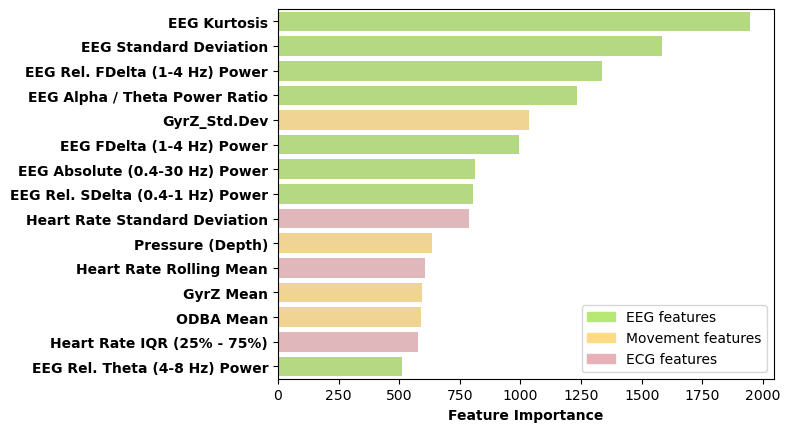

In [36]:
top_feat_imps = feat_imps.iloc[:15]

# Get bar colors
def get_color(feature):
    if 'eeg' in feature:
        return '#B7E873'
    elif 'heartrate' in feature:
        return '#E7B1B7'
    else:
        return '#FFDA85'
bar_colors = pd.Series(top_feat_imps.index).apply(get_color).values

# More readable names
top_feat_imps.index = pd.Series(top_feat_imps.index).replace({
    'yasa_eeg_kurt': 'EEG Kurtosis',
    'yasa_eeg_std': 'EEG Standard Deviation',
    'yasa_eeg_fdelta_relative': 'EEG Rel. FDelta (1-4 Hz) Power',
    'yasa_eeg_at': 'EEG Alpha / Theta Power Ratio',
    'GryZ_Std.Dev': 'GyrZ Standard Deviation',
    'yasa_eeg_fdelta': 'EEG FDelta (1-4 Hz) Power',
    'yasa_eeg_abspow': 'EEG Absolute (0.4-30 Hz) Power',
    'yasa_eeg_sdelta_relative': 'EEG Rel. SDelta (0.4-1 Hz) Power',
    'yasa_heartrate_std': 'Heart Rate Standard Deviation',
    'Pressure_Mean': 'Pressure (Depth)',
    'yasa_heartrate_mean': 'Heart Rate Rolling Mean',
    'GyrZ_Mean': 'GyrZ Mean',
    'ODBA_Mean': 'ODBA Mean',
    'yasa_heartrate_iqr': 'Heart Rate IQR (25% - 75%)',
    'yasa_eeg_theta_relative': 'EEG Rel. Theta (4-8 Hz) Power'
}).values

ax = sns.barplot(orient='h', x=top_feat_imps.values, y=top_feat_imps.index.values, palette=bar_colors)
ax.set_yticklabels(ax.get_yticklabels(), fontdict={'weight': 'bold'})
ax.set_xlabel('Feature Importance', fontdict={'weight': 'bold'})

# Create legend
green_patch = mpatches.Patch(color='#B7E873', label='EEG features')
yellow_patch = mpatches.Patch(color='#FFDA85', label='Movement features')
red_patch = mpatches.Patch(color='#E7B1B7', label='ECG features')

plt.legend(handles=[green_patch, yellow_patch, red_patch])

plt.show()
plt.show()